In [1]:
import ast 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_poland = df[(df["job_country"] == "Poland")] 
df_poland = df_poland.dropna(subset=['salary_year_avg'])
df_poland

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1490,Data Analyst,HR Data Analyst,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-12-16 13:11:23,False,False,Poland,year,43200.0,NaN,Westinghouse Electric Company,"[gdpr, sap, powerpoint, excel]","{'analyst_tools': ['sap', 'powerpoint', 'excel..."
6567,Data Analyst,Data Analytics Assistant,"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-04-25 13:25:00,True,False,Poland,year,56700.0,NaN,Publicis Groupe,"[r, python, spark, tidyverse, pandas, numpy]","{'libraries': ['spark', 'tidyverse', 'pandas',..."
11088,Data Engineer,Big Data Engineer,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-04-15 13:20:55,True,False,Poland,year,45000.0,NaN,Allegro,"[sql, java, kotlin, scala, groovy, gcp, bigque...","{'cloud': ['gcp', 'bigquery'], 'libraries': ['..."
12745,Data Analyst,Senior Clinical Data Manager I,"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-05-29 13:14:00,False,False,Poland,year,72900.0,NaN,Allucent,"[word, excel, powerpoint]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
12986,Data Engineer,Data Engineer,"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-02-17 13:46:15,False,False,Poland,year,147500.0,NaN,Alter Solutions,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774165,Data Analyst,Data Architect (BN),"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-01-20 02:02:50,False,False,Poland,year,165000.0,NaN,Alter Solutions,None,None
774335,Software Engineer,Senior Linux Software Engineer – Robotics,"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-05-17 01:25:07,False,False,Poland,year,89100.0,NaN,Alarm.com,"[python, c++, azure, linux, ubuntu, docker]","{'cloud': ['azure'], 'os': ['linux', 'ubuntu']..."
774339,Business Analyst,Regional Insight Analyst (CRM & Loyalty) for E...,"Warsaw, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-03-16 01:24:09,False,False,Poland,year,80850.0,NaN,H&M Group,"[sql, sas, sas, tableau]","{'analyst_tools': ['sas', 'tableau'], 'program..."
776783,Cloud Engineer,[GPT] Cloud Security Engineer,"Kraków, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-07-20 05:17:06,True,False,Poland,year,56700.0,NaN,Software Mind,"[aws, azure, gcp]","{'cloud': ['aws', 'azure', 'gcp']}"


In [5]:
jobs_compare = ['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer']

In [11]:
job_titles = df_poland['job_title_short'].value_counts().index[:8].tolist()

# filter the df for the top 6 job titles
df_poland_compare = df_poland[df_poland['job_title_short'].isin(jobs_compare)]

# order the job titles by median salary
job_order = df_poland_compare.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

df_poland_compare["job_title_short"].value_counts()

job_title_short
Data Engineer                46
Data Analyst                 43
Data Scientist               29
Machine Learning Engineer    23
Senior Data Scientist        12
Senior Data Engineer          9
Senior Data Analyst           9
Name: count, dtype: int64

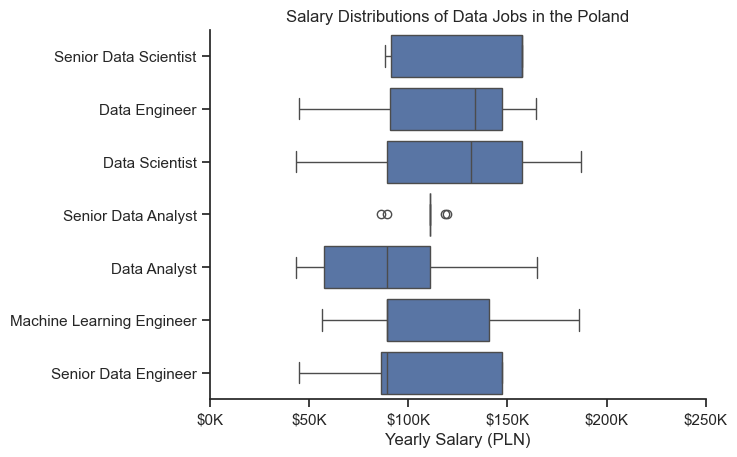

In [13]:
sns.boxplot(data=df_poland_compare, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the Poland')
plt.xlabel('Yearly Salary (PLN)')
plt.ylabel('')
plt.xlim(0, 250000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [14]:
df_DA_Poland = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Poland')].copy()

df_DA_Poland = df_DA_Poland.dropna(subset=['salary_year_avg'])

df_DA_Poland = df_DA_Poland.explode('job_skills')

df_DA_Poland[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1490,43200.0,gdpr
1490,43200.0,sap
1490,43200.0,powerpoint
1490,43200.0,excel
6567,56700.0,r


In [15]:
df_DA_top_pay = df_DA_Poland.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
aws,1,165000.0
linux,1,165000.0
mongo,1,165000.0
hadoop,2,133750.0
nosql,2,131750.0
bigquery,1,111175.0
sas,2,111175.0
snowflake,1,111175.0
spark,8,111175.0


In [16]:
df_DA_skills = df_DA_Poland.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
airflow,5,111175.0
tableau,13,111175.0
windows,5,111175.0
spark,8,111175.0
looker,6,111175.0
gcp,10,106837.5
python,15,102500.0
sql,26,102500.0
power bi,8,82350.0


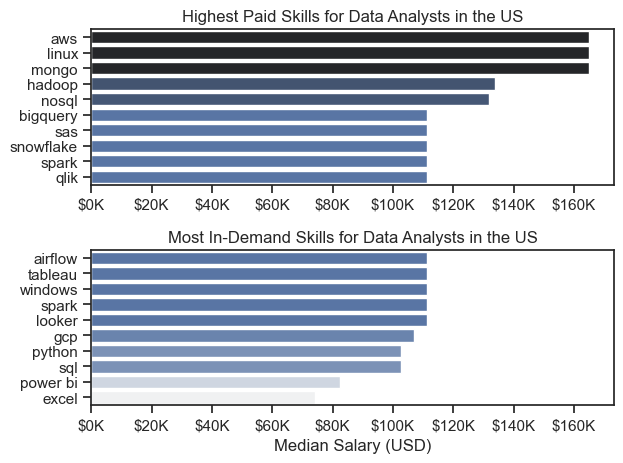

In [17]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()